In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wrangling

In [83]:
df = pd.read_csv('Data/nfl_player_stats_by_career_2020.csv')

In [85]:
pd.set_option('display.max_columns', None)
df.head()

,id,adjusted_net_yards_per_attempt_index,adjusted_net_yards_per_pass_attempt,adjusted_yards_per_attempt,adjusted_yards_per_attempt_index,all_purpose_yards,approximate_value,assists_on_tackles,attempted_passes,birth_date,blocked_punts,catch_percentage,completed_passes,completion_percentage_index,espn_qbr,extra_point_percentage,extra_points_attempted,extra_points_made,field_goal_percentage,field_goals_attempted,field_goals_made,fifty_plus_yard_field_goal_attempts,fifty_plus_yard_field_goals_made,fourth_quarter_comebacks,fourty_to_fourty_nine_yard_field_goal_attempts,fourty_to_fourty_nine_yard_field_goals_made,fumbles,fumbles_forced,fumbles_recovered,fumbles_recovered_for_touchdown,game_winning_drives,games,games_started,height,interception_percentage,interception_percentage_index,interceptions,interceptions_returned_for_touchdown,interceptions_thrown,kickoff_return_touchdown,kickoff_return_yards,kickoff_returns,less_than_nineteen_yards_field_goal_attempts,less_than_nineteen_yards_field_goals_made,longest_field_goal_made,longest_interception_return,longest_kickoff_return,longest_pass,longest_punt,longest_punt_return,longest_reception,longest_rush,name,net_yards_per_attempt_index,net_yards_per_pass_attempt,passer_rating_index,passes_defended,passing_completion,passing_touchdown_percentage,passing_touchdowns,passing_yards,passing_yards_per_attempt,player_id,position,punt_return_touchdown,punt_return_yards,punt_returns,punts,qb_record,quarterback_rating,receiving_touchdowns,receiving_yards,receiving_yards_per_game,receiving_yards_per_reception,receptions,receptions_per_game,rush_attempts,rush_attempts_per_game,rush_touchdowns,rush_yards,rush_yards_per_attempt,rush_yards_per_game,rushing_and_receiving_touchdowns,sack_percentage,sack_percentage_index,sacks,safeties,season,tackles,team_abbreviation,thirty_to_thirty_nine_yard_field_goal_attempts,thirty_to_thirty_nine_yard_field_goals_made,times_pass_target,times_sacked,total_punt_yards,touchdown_percentage_index,touches,twenty_to_twenty_nine_yard_field_goal_attempts,twenty_to_twenty_nine_yard_field_goals_made,weight,yards_from_scrimmage,yards_lost_to_sacks,yards_per_attempt_index,yards_per_completed_pass,yards_per_game_played,yards_per_kickoff_return,yards_per_punt,yards_per_punt_return,yards_per_touch,yards_recovered_from_fumble,yards_returned_from_interception,year
0,AdamJa00 Career,NaN,NaN,NaN,NaN,NaN,29.0,72.0,NaN,1995-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,4.0,30.0,NaN,49.0,49.0,6-1,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,Jamal Adams,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,AdamJa00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,Career,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,99.0,Career
1,AmadUg00 Career,NaN,NaN,NaN,NaN,NaN,1.0,5.0,NaN,1997-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,NaN,21.0,1.0,5-9,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Ugo Amadi,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,AmadUg00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Career,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Career
2,BartCo00 Career,NaN,NaN,NaN,NaN,NaN,2.0,21.0,NaN,1996-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,NaN,21.0,4.0,6-2,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Cody Barton,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,BartCo00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Career,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Career
3,BellNi01 Career,NaN,NaN,NaN,NaN,74.0,15.0,53.0,NaN,1989-05-12,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,0.0,NaN,140.0,17.0,6-1,NaN,NaN

In [99]:
# set option so I'm able to see all my columns
pd.set_option('display.max_columns', None)

#I've filtered out non-RBs by including only player's with over 500 rushing attempts and under 200 passing attempts in there career
# in the nfl a running back will rush about 500 times over 3 seasons
# there are a lot of running QBS so to filter them out i've made sure to only include players with less than 200 passing attempts
df['attempted_passes'] = df['attempted_passes'].replace(np.NaN, 0)
rb_df = df[(df['rush_attempts'] > 500) & (df['attempted_passes'] < 200)]

#dropped all columns that do not pertain to QBs.
rb_df = rb_df.dropna(axis=1, thresh=50)

#dropped unnecessary columns
rb_df.drop(columns=['id', 'adjusted_net_yards_per_pass_attempt', 'attempted_passes', 'adjusted_yards_per_attempt', 'approximate_value',
                   'assists_on_tackles', 'birth_date', 'completed_passes', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'height',
                   'interception_percentage', 'interceptions_thrown', 'longest_kickoff_return', 'longest_punt_return', 'longest_reception', 'longest_pass', 
                   'net_yards_per_pass_attempt', 'passing_completion', 'passing_touchdown_percentage', 'passing_touchdowns', 'longest_rush',
                   'passing_yards', 'passing_yards_per_attempt', 'quarterback_rating', 'sacks', 'season', 'times_pass_target', 'tackles',
                   'times_sacked', 'touches', 'weight', 'yards_from_scrimmage', 'yards_lost_to_sacks', 'yards_per_completed_pass',
                   'yards_per_game_played', 'year', 'yards_recovered_from_fumble', 'all_purpose_yards', 'catch_percentage'], inplace=True)

df[['kickoff_return_touchdown', 'kickoff_return_yards', 'kickoff_returns', 
   'punt_return_touchdown', 'punt_return_yards', 'punt_returns']].fillna(0, inplace=True)

/Users/micahswain/.local/share/virtualenvs/nfl-hof-predictor-Gzf-fT6a/lib/python3.8/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [100]:
#import and wrangler HOF csv.
hof = pd.read_csv('Data/Hall of Fame List.csv')

hof['hof'] = 1

hof = hof[['name', 'hof']]

hof

,name,hof
0,Steve Atwater,1
1,Isaac Bruce,1
2,Harold Carmichael,1
3,Jimbo Covert,1
4,Bobby Dillon,1
...,...,...
289,Cal Hubbard,1
290,Don Hutson,1
291,Bronko Nagurski,1
292,Ernie Nevers,1


In [101]:
#merged qb and HOF datasets
rb_df = pd.merge(rb_df, hof, on='name', how='left')

rb_df.set_index('player_id', inplace=True)

In [102]:
#data cleaning
rb_df.drop(columns='name', inplace=True)
rb_df['hof'] = rb_df['hof'].replace(np.NaN, 0)

In [103]:
#import/wrangle/merge player season data to get years played in NFL
sdf = pd.read_csv('Data/nfl_player_stats_by_season_2020.csv')

sdf_rb = sdf[sdf['player_id'].isin(rb_df.index)]

sdf_rb_group = sdf_rb.groupby('player_id').agg(start_year = ('season' , 'min'), end_year = ('season', 'max'))

rb_df = pd.merge(rb_df, sdf_rb_group, on='player_id', how='left')

#filtered out active/ineligible QBs from the data set
test = rb_df[rb_df['end_year'] >= 2015]
rb_df = rb_df[rb_df['end_year'] < 2015]

In [104]:
rb_df[rb_df['hof']==1]

,fumbles,games,games_started,kickoff_return_touchdown,kickoff_return_yards,kickoff_returns,punt_return_touchdown,punt_return_yards,punt_returns,receiving_touchdowns,receiving_yards,receiving_yards_per_game,receiving_yards_per_reception,receptions,receptions_per_game,rush_attempts,rush_attempts_per_game,rush_touchdowns,rush_yards,rush_yards_per_attempt,rush_yards_per_game,rushing_and_receiving_touchdowns,yards_per_kickoff_return,yards_per_punt_return,yards_per_touch,hof,start_year,end_year
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TomlLa00,30.0,170.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,4772.0,28.1,7.6,624.0,3.7,3174.0,18.7,145.0,13684.0,4.3,80.5,162.0,NaN,NaN,4.9,1.0,2001.0,2011.0
JameEd00,44.0,148.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3364.0,22.7,7.8,433.0,2.9,3028.0,20.5,80.0,12246.0,4.0,82.7,91.0,NaN,NaN,4.5,1.0,1999.0,2009.0
BettJe00,41.0,192.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1449.0,7.5,7.2,200.0,1.0,3479.0,18.1,91.0,13662.0,3.9,71.2,94.0,NaN,NaN,4.1,1.0,1993.0,2005.0
FaulMa00,36.0,176.0,156.0,0.0,18.0,2.0,0.0,0.0,0.0,36.0,6875.0,39.1,9.0,767.0,4.4,2836.0,16.1,100.0,12279.0,4.3,69.8,136.0,9.0,NaN,5.3,1.0,1994.0,2005.0
MartCu00,29.0,168.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,3329.0,19.8,6.9,484.0,2.9,3518.0,20.9,90.0,14101.0,4.0,83.9,100.0,NaN,NaN,4.4,1.0,1995.0,2005.0
SmitEm00,61.0,226.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3224.0,14.3,6.3,515.0,2.3,4409.0,19.5,164.0,18355.0,4.2,81.2,175.0,NaN,NaN,4.4,1.0,1990.0,2004.0
DaviTe00,20.0,78.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1280.0,16.4,7.6,169.0,2.2,1655.0,21.2,60.0,7607.0,4.6,97.5,65.0,NaN,NaN,4.9,1.0,1995.0,2001.0
ThomTh00,50.0,182.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,4458.0,24.5,9.4,472.0,2.6,2877.0,15.8,65.0,12074.0,4.2,66.3,88.0,NaN,NaN,4.9,1.0,1988.0,2000.0
SandBa00,41.0,153.0,151.0,0.0,118.0,5.0,0.0,0.0,0.0,10.0,2921.0,19.1,8.3,352.0,2.3,3062.0,20.0,99.0,15269.0,5.0,99.8,109.0,23.6,NaN,5.3,1.0,1989.0,1998.0


# Train/Test Split

In [105]:
target = 'hof'
y = rb_df[target]
X = rb_df.drop(columns=target)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2)

# Baseline

In [107]:
baseline_acc = y_train.value_counts(normalize=True).max()

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.9392857142857143


# Build Model - Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [109]:
np.random.seed(42) 

In [110]:
log_model = make_pipeline(
       SimpleImputer(),
       StandardScaler(),
       LogisticRegression()
)

log_model.fit(X_train, y_train);

## Check Metrics - Logistic Regression

In [111]:
print('Training Accuracy Score:', log_model.score(X_train, y_train))
print('Validation Accuracy Score:', log_model.score(X_val, y_val))

Training Accuracy Score: 0.9964285714285714
Validation Accuracy Score: 0.9857142857142858


In [112]:
X_test = test.drop(columns=target)

y_pred_log = log_model.predict(X_test)

results3 = pd.DataFrame(y_pred_log, columns=['hof'], index=X_test.index)

In [113]:
results3[results3['hof'] == 1]

,hof
player_id,
PeteAd01,1.0
GoreFr00,1.0


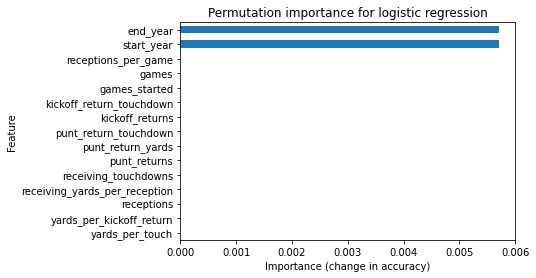

In [114]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(log_model, X_val, y_val, n_jobs=-1, random_state=42)

data = {'mean_importance' : perm_imp['importances_mean'], 'std_importances' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('mean_importance', ascending=True, inplace=True)

df['mean_importance'].tail(15).plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for logistic regression');

# Build Model - Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
forest_model = make_pipeline(
       SimpleImputer(),
       RandomForestClassifier(max_depth=2, n_estimators=500)
)

forest_model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=2, n_estimators=500))])

In [118]:
print('FOREST: Training Accuracy:', forest_model.score(X_train, y_train))
print('FOREST: VAl Accuracy:', forest_model.score(X_val, y_val))

FOREST: Training Accuracy: 0.975
FOREST: VAl Accuracy: 1.0


# See Predictions

In [119]:
y_pred_forest = forest_model.predict(X_test)

results = pd.DataFrame(y_pred_forest, columns=['hof'], index=X_test.index)

results[results['hof'] == 1]

,hof
player_id,
PeteAd01,1.0
GoreFr00,1.0


# Feature Importance

Text(0.5, 0, 'Information Gain')

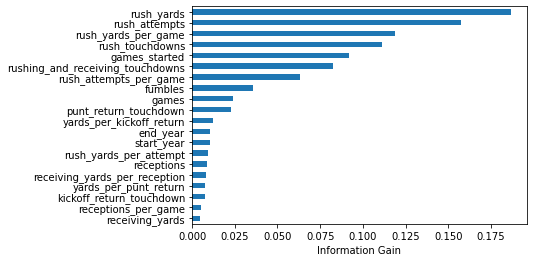

In [122]:
features = X_train.columns
importances = forest_model.named_steps['randomforestclassifier'].feature_importances_

feature_importances = pd.Series(importances, index=features).sort_values()

feature_importances.tail(20).plot(kind='barh')
plt.xlabel('Information Gain')

# Permutation Importance

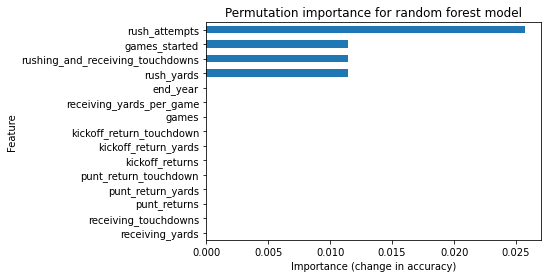

In [123]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(forest_model, X_val, y_val, n_jobs=-1, random_state=42)

data = {'mean_importance' : perm_imp['importances_mean'], 'std_importances' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('mean_importance', ascending=True, inplace=True)

df['mean_importance'].tail(15).plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for random forest model');

# Build Model - XGBoost

In [124]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
boost_model = XGBClassifier(n_estimators=500, n_jobs=-1, random_state=42)

boost_model.fit(X_train, y_train);

In [126]:
print('Training accuracy:', boost_model.score(X_train, y_train))
print('Val accuracy:', boost_model.score(X_val, y_val))

Training accuracy: 1.0
Val accuracy: 0.9857142857142858


In [127]:
y_pred_boost = boost_model.predict(X_test)

results2 = pd.DataFrame(y_pred_boost, columns=['hof'], index=X_test.index)

In [128]:
results2[results2['hof'] == 1]

,hof
player_id,
PeteAd01,1.0
GoreFr00,1.0


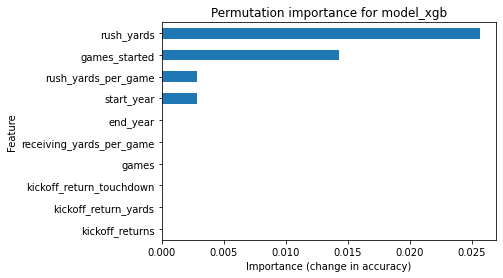

In [129]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(boost_model, X_val, y_val, n_jobs=-1, random_state=42)

data = {'mean_importance' : perm_imp['importances_mean'], 'std_importances' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('mean_importance', ascending=True, inplace=True)

df['mean_importance'].tail(10).plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for model_xgb');

# ROC-Curve compare Random Forest and XGBoost

In [130]:
from sklearn.metrics import plot_roc_curve

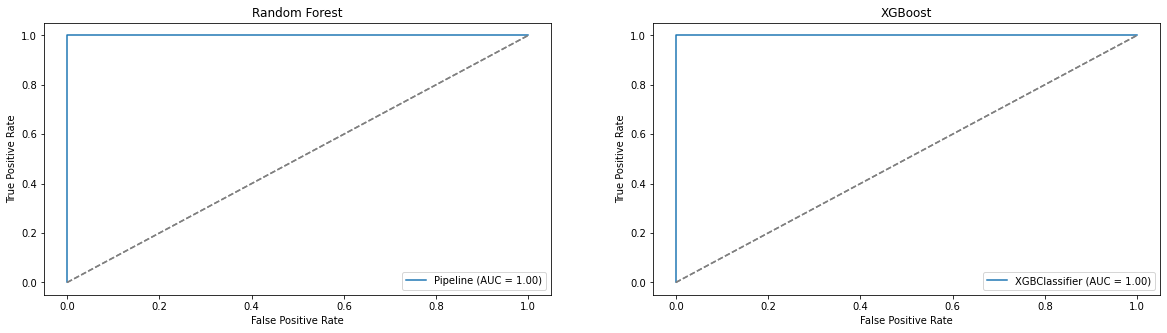

In [131]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

plot_roc_curve(forest_model, X_val, y_val, ax=ax1)
plot_roc_curve(boost_model, X_val, y_val, ax=ax2)


ax1.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax2.plot([(0,0), (1,1)], color='grey', linestyle='--')

ax1.set_title('Random Forest')
ax2.set_title('XGBoost')


plt.show()

# Random Forest with K-folds

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [134]:
forest_model1 = make_pipeline(
       SimpleImputer(),
       RandomForestClassifier()
)

param_space = {"randomforestclassifier__criterion": ['gini', 'entropy'],
         "randomforestclassifier__max_depth": [1, 2, 3, 4],
         "randomforestclassifier__min_samples_leaf": [2, 3, 4, 5],
         "randomforestclassifier__min_samples_split": [2, 3, 4, 5, 6],
         "randomforestclassifier__n_estimators": [100, 200, 300, 400, 500],
         "randomforestclassifier__max_samples" : [0.5, 0.6, 0.7, 0.8, 0.9, 1]
 }

forest_rand_search = RandomizedSearchCV(forest_model1, param_distributions=param_space, n_iter=20,
                                         scoring="accuracy", verbose=True, cv=StratifiedKFold(n_splits=5),
                                         n_jobs=-1, random_state=42)

forest_rand_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.5s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [1,
                                                                              2,
                                                                              3,
                                                                              4],
                                        'randomforestclassifier__max_samples': [0.5,
                                                            

In [135]:
forest_rand_search.best_params_

{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__max_samples': 0.9,
 'randomforestclassifier__max_depth': 1,
 'randomforestclassifier__criterion': 'gini'}

In [136]:
forest_rand_search.best_score_

0.9800000000000001

In [137]:
y_pred_tree = forest_rand_search.predict(X_test)

results1 = pd.DataFrame(y_pred_tree, columns=['hof'], index=X_test.index)

In [138]:
results1[results1['hof'] == 1]

,hof
player_id,
PeteAd01,1.0
GoreFr00,1.0
